# Results obtained using various solvers for the Vehicle Routing Problem
The `cost` acts as a parameter of comparison between different solvers. In this project it is the total sum of distances of the routes by each vehicle.
The approximation ratio is the ratio of the cost of the obtained from the solver to that of the best known solution. The closer it is to 1, the better the solver is.

By default the `LeapHybridCQMSampler` lets the solver run for around **5 seconds**. For better results this can be increased by passing a parameter `time_limit` into the solver's `.solve()` method. However, one needs to be careful about it as running it for too long may exhaust the limit of resources that D-Wave provides.

In [1]:
from utils import random_routing_instance, solve_vrp, compare_solvers

n=8     # number of clients
m=3     # number of vehicles

cost, xc, yc = random_routing_instance(n, seed=100)

In [2]:
### Select the type of model to solve VRP
#    1: Constrained Quadratic Model - A new model released by D-Wave Systems capable of encoding Quadratically Constrained Quadratic Programs (QCQPs)
#    2: Binary Quadratic Model - A model that encodes Ising or QUBO problems
model = 'CQM'


### The time limit (in seconds) for the solvers to run on the `LeapHybridCQMSampler` backend
time_limit = 10


### Select solver
#    1: RAS (Route Activation Solver)
#    2: FQS (Full QUBO Solver)
#    3: GPS (Guillermo, Parfait, Saúl) (only using CQM)
#    4: DBSCANS (Density-Based Spatial Clustering of Applications with Noise - Solver)
#    5: SPS (Solution Partition Solver)
solver = 'ras'


ROUTE ACTIVATION SOLVER (Constrained Quadratic Model)
28 feasible solutions of 56.
Minimum total cost: 8027.0
Number of variables: 104
Runtime: 20979.781 ms


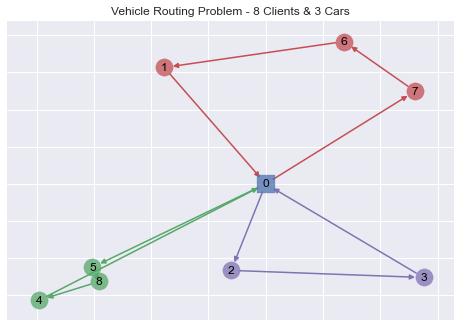

In [3]:
solve_vrp(n, m, cost, xc, yc, model=model, solver=solver, time_limit=time_limit)

In [4]:
# Number of iterations to get the average approximation ratio for a particular solver
# Warning! More iterations will take more time and resources to run
n_iter = 1

In [5]:
comparison_table = compare_solvers(n, m, cost, xc, yc, n_iter=n_iter, time_limit=time_limit)


EXACT (CLASSICAL) SOLVER
Minimum cost: 7659.0
Time taken to solve: 213.668 ms

ROUTE ACTIVATION SOLVER (Constrained Quadratic Model)
30 feasible solutions of 55.
Minimum total cost: 8383.0
Number of variables: 104
Runtime: 19991.945 ms

FULL QUBO SOLVER (Constrained Quadratic Model)
48 feasible solutions of 52.
Minimum total cost: 8616.0
Number of variables: 192
Runtime: 19958.949 ms

GUILLERMO, PARFAIT, SAÚL SOLVER (Constrained Quadratic Model)
7 feasible solutions of 35.
Minimum total cost: 11440.0
Number of variables: 704
Runtime: 20023.945 ms


In [14]:
print('Minimum cost of best known solution:', comparison_table[0]['exact_min_cost'])
for solver_id in comparison_table[1]:
  print(f'{solver_id}:', '\t', f'average min cost = {comparison_table[1][solver_id]["avg_min_cost"]}',
                         '\t', f'average runtime = {comparison_table[1][solver_id]["avg_runtime"]}',
                         '\t', f'number of variables = {comparison_table[1][solver_id]["num_vars"]}',
                         '\t', f'approximation ratio = {comparison_table[1][solver_id]["approximation_ratio"]}'
  )

Minimum cost of best known solution: 7659.0
RAS: 	 average min cost = 8383.0 	 average runtime = 19991.945 	 number of variables = 104 	 approximation ratio = 1.0945293119206163
FQS: 	 average min cost = 8616.0 	 average runtime = 19958.949 	 number of variables = 192 	 approximation ratio = 1.1249510379945162
GPS: 	 average min cost = 11440.0 	 average runtime = 20023.945 	 number of variables = 704 	 approximation ratio = 1.4936675806241024
